In [ ]:
import gdown
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, classification_report, confusion_matrix)
import joblib  # For saving models

In [ ]:
df = pd.read_csv("cicddos2017.csv")

<ipython-input-3-47919b40103e>:1: DtypeWarning: Columns (0,1,3,6,83) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(output)


In [ ]:
df["ClassLabel"].value_counts()

,count
ClassLabel,
BENIGN,2273097
Unknown,288602
DoS,252661
PortScan,158930
DDoS,128027
Brute Force,13835
Web Attack,2180
Bot,1966
Infiltration,36


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df[df["ClassLabel"]=="DoS"]

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWR Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,ClassLabel
2433200,172.16.0.1-192.168.10.50-49631-80-6,172.16.0.1,49631.0,192.168.10.50,80.0,6.0,5/7/2017 2:24,5169956.0,8.0,6.0,1101.0,4222.0,410.0,0.0,137.625000,185.758628,3525.0,0.0,703.666667,1395.868284,1029.602573,2.707953,3.976889e+05,1368409.299,4951173.0,112.0,218783.0,3.125471e+04,3.068629e+04,78311.0,219.0,5169833.0,1033966.6,2218975.060,5002421.0,840.0,0.0,0.0,0.0,0.0,172.0,132.0,1.547402,1.160551,0.0,3525.0,354.866667,895.115146,8.012311e+05,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,380.214286,137.625000,703.666667,0.0,0.0,0.0,0.0,0.0,0.0,8.0,1101.0,6.0,4222.0,8192.0,254.0,7.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DoS slowloris,DoS
2453342,172.16.0.1-192.168.10.50-49631-80-6,172.16.0.1,49631.0,192.168.10.50,80.0,6.0,5/7/2017 2:24,229.0,2.0,0.0,12.0,0.0,6.0,6.0,6.000000,0.000000,0.0,0.0,0.000000,0.000000,52401.746720,8733.624454,2.290000e+02,0.000,229.0,229.0,229.0,2.290000e+02,0.000000e+00,229.0,229.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,8733.624454,0.000000,6.0,6.0,6.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9.000000,6.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,2.0,12.0,0.0,0.0,253.0,-1.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DoS slowloris,DoS
2453343,172.16.0.1-192.168.10.50-49632-80-6,172.16.0.1,49632.0,192.168.10.50,80.0,6.0,5/7/2017 2:24,5001928.0,3.0,1.0,12.0,0.0,6.0,0.0,4.000000,3.464102,0.0,0.0,0.000000,0.000000,2.399075,0.799692,1.667309e+06,2886995.878,5000925.0,127.0,5001928.0,2.500964e+06,3.535479e+06,5000925.0,1003.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,72.0,32.0,0.599769,0.199923,0.0,6.0,2.400000,3.286335,1.080000e+01,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.000000,4.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,3.0,12.0,1.0,0.0,8192.0,29200.0,2.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DoS slowloris,DoS
2453344,172.16.0.1-192.168.10.50-49633-80-6,172.16.0.1,49633.0,192.168.10.50,80.0,6.0,5/7/2017 2:24,5125872.0,8.0,7.0,1659.0,2514.0,467.0,0.0,207.375000,221.278065,1047.0,0.0,359.142857,420.183860,814.105385,2.926331,3.661337e+05,1320784.350,4954614.0,73.0,171258.0,2.446543e+04,2.194525e+04,57169.0,1001.0,5125743.0,854290.5,2033515.304,5004981.0,2049.0,0.0,0.0,0.0,0.0,172.0,152.0,1.560710,1.365621,0.0,1047.0,260.812500,322.554847,1.040416e+05,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,278.200000,207.375000,359.142857,0.0,0.0,0.0,0.0,0.0,0.0,8.0,1659.0,7.0,2514.0,8192.0,262.0,7.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DoS slowloris,DoS
2453345,172.16.0.1-192.168.10.50-49633-80-6,172.16.0.1,49633.0,192.168.10.50,80.0,6.0,5/7/2017 2:25,214.0,2.0,0.0,12.0,0.0,6.0,6.0,6.000000,0.000000,0.0,0.0,0.000000,0.000000,56074.766360,9345.794393,2.140000e+02,0.000,214.0,214.0,214.0,2.140000e+02,0.000000e+00,214.0,214.0,0.0

In [ ]:
dff=df[df["ClassLabel"]=="DoS"]

In [ ]:
dff.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,ClassLabel
2433200,172.16.0.1-192.168.10.50-49631-80-6,172.16.0.1,49631.0,192.168.10.50,80.0,6.0,5/7/2017 2:24,5169956.0,8.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DoS slowloris,DoS
2453342,172.16.0.1-192.168.10.50-49631-80-6,172.16.0.1,49631.0,192.168.10.50,80.0,6.0,5/7/2017 2:24,229.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DoS slowloris,DoS
2453343,172.16.0.1-192.168.10.50-49632-80-6,172.16.0.1,49632.0,192.168.10.50,80.0,6.0,5/7/2017 2:24,5001928.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DoS slowloris,DoS
2453344,172.16.0.1-192.168.10.50-49633-80-6,172.16.0.1,49633.0,192.168.10.50,80.0,6.0,5/7/2017 2:24,5125872.0,8.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DoS slowloris,DoS
2453345,172.16.0.1-192.168.10.50-49633-80-6,172.16.0.1,49633.0,192.168.10.50,80.0,6.0,5/7/2017 2:25,214.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DoS slowloris,DoS


In [ ]:
dff["Src IP"].value_counts()

,count
Src IP,
172.16.0.1,252661


In [ ]:
print(df['ClassLabel'].value_counts())

ClassLabel
BENIGN                   2273097
Unknown                   288602
DoS                       252661
PortScan                  158930
DDoS                      128027
Brute Force                13835
Web Attack                  2180
Bot                         1966
Infiltration                  36
Vulnerability Exploit         11
Name: count, dtype: int64


In [ ]:
print(df['Protocol'].value_counts())

Protocol
6.0     1829554
17.0     999493
0.0        1696
Name: count, dtype: int64


In [ ]:
print(df[df['Protocol']==0]["Label"].value_counts())

Label
BENIGN      1690
PortScan       6
Name: count, dtype: int64


In [ ]:
df = df[df['ClassLabel'] != 'Unknown']

# Check the new class distribution
print(df['ClassLabel'].value_counts())


ClassLabel
BENIGN                   2273097
DoS                       252661
PortScan                  158930
DDoS                      128027
Brute Force                13835
Web Attack                  2180
Bot                         1966
Infiltration                  36
Vulnerability Exploit         11
Name: count, dtype: int64


In [ ]:
from sklearn.utils import resample


# Remove "Automated Attacks" and "Rare Attacks"
df_filtered = df[~df['ClassLabel'].isin(["Brute Force", "Web Attack","Bot", "Infiltration", "Vulnerability Exploit"])]

# Define the target size (minimum count of remaining classes)
target_size = df_filtered['ClassLabel'].value_counts().min()

# Undersample remaining classes
df_balanced = df_filtered.groupby('ClassLabel').apply(lambda x: x.sample(target_size, random_state=42)).reset_index(drop=True)

# Check the new class distribution
print(df_balanced['ClassLabel'].value_counts())


<ipython-input-6-f365352540ad>:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced = df_filtered.groupby('ClassLabel').apply(lambda x: x.sample(target_size, random_state=42)).reset_index(drop=True)


ClassLabel
BENIGN      128027
DDoS        128027
DoS         128027
PortScan    128027
Name: count, dtype: int64


###test

In [ ]:
print(df.columns)

Index(['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Len

In [ ]:
import numpy as np

# Check for infinity values
print(np.isinf(X).sum().sum())  # Total number of infinity values


809


In [ ]:
import numpy as np

# Find columns with infinity values
inf_columns = X.columns[np.isinf(X).any()].tolist()

# Print the columns with inf values
print("Columns containing infinity values:", inf_columns)


Columns containing infinity values: ['Flow Bytes/s', 'Flow Packets/s']


In [ ]:
print(X['Flow Packets/s'])


0          41666.666670
1          15384.615380
2          38461.538460
3             72.953946
4            805.282654
              ...      
512103     50000.000000
512104    250000.000000
512105     66666.666670
512106     62500.000000
512107     37735.849060
Name: Flow Packets/s, Length: 512108, dtype: float64


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Select the two problematic columns
columns_to_check = ['Flow Bytes/s', 'Flow Packets/s']

# Compute quartiles
quartiles = X[columns_to_check].quantile([0.25, 0.50, 0.75])
quartiles.index = ['Q1 (25%)', 'Q2 (Median)', 'Q3 (75%)']

# Display the quartiles
print("Quartiles for 'Flow Bytes/s' and 'Flow Packets/s':\n", quartiles)


Quartiles for 'Flow Bytes/s' and 'Flow Packets/s':
               Flow Bytes/s  Flow Packets/s
Q1 (25%)        119.545056        0.579811
Q2 (Median)    5620.668732       79.075606
Q3 (75%)     133333.333300    37037.037040


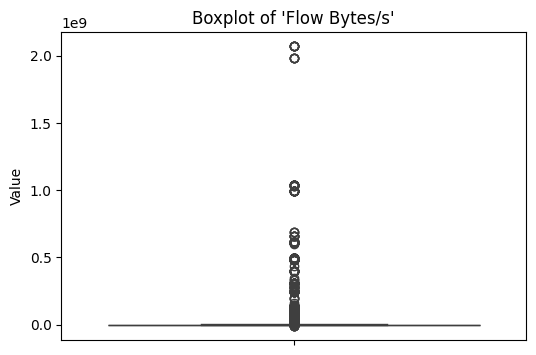

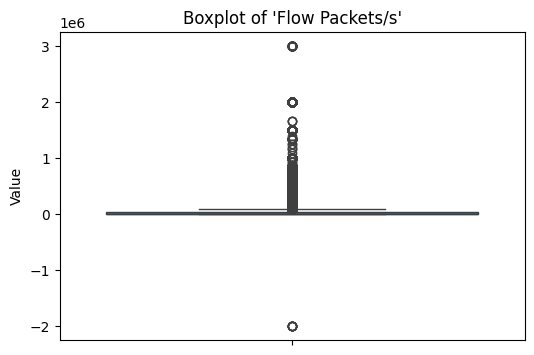

In [ ]:
# Create individual boxplots
plt.figure(figsize=(6, 4))
sns.boxplot(y=X['Flow Bytes/s'])
plt.title("Boxplot of 'Flow Bytes/s'")
plt.ylabel("Value")
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(y=X['Flow Packets/s'])
plt.title("Boxplot of 'Flow Packets/s'")
plt.ylabel("Value")
plt.show()



In [ ]:
# Replace inf values with NaN
X[["Flow Bytes/s", "Flow Packets/s"]] = X[["Flow Bytes/s", "Flow Packets/s"]].replace([np.inf, -np.inf], np.nan)

# Drop rows with NaN values
X = X.dropna(subset=["Flow Bytes/s", "Flow Packets/s"])


<ipython-input-23-124edfd194b8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[["Flow Bytes/s", "Flow Packets/s"]] = X[["Flow Bytes/s", "Flow Packets/s"]].replace([np.inf, -np.inf], np.nan)


In [ ]:
# Encode target labels
label_encoder = LabelEncoder()
df_balanced["ClassLabel"] = label_encoder.fit_transform(df_balanced["ClassLabel"])

In [ ]:
# Display the mapping of class labels to encoded values
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping: ", label_mapping)

Label Mapping:  {'BENIGN': 0, 'DDoS': 1, 'DoS': 2, 'PortScan': 3}


In [ ]:
# Split dataset
X = df_balanced.drop(columns=["Flow ID","Src IP","Src Port","Dst IP","Dst Port","Protocol","Timestamp","Label","ClassLabel"])
y = df_balanced["ClassLabel"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
print(y_train.value_counts())
y_test.value_counts()

ClassLabel
1    102422
3    102422
2    102421
0    102421
Name: count, dtype: int64


,count
ClassLabel,
0,25606
2,25606
1,25605
3,25605


In [ ]:
import numpy as np

print("Max value in X_train:", np.max(X_train))
print("Min value in X_train:", np.min(X_train))
print("Max value in X_test:", np.max(X_test))
print("Min value in X_test:", np.min(X_test))

Max value in X_train: inf
Min value in X_train: -32212234632.0
Max value in X_test: inf
Min value in X_test: -83885313.0


In [ ]:
import numpy as np
import pandas as pd

# Find rows with inf or -inf in X_train
inf_mask = np.isinf(X_train).any(axis=1)
inf_mask2 = np.isinf(X_test).any(axis=1)  # Boolean mask for rows containing inf values

# Remove the corresponding rows in both X_train and y_train
X_train = X_train[~inf_mask]
y_train = y_train[~inf_mask]
X_test = X_test[~inf_mask2]
y_test = y_test[~inf_mask2]

# Check alignment
assert len(X_train) == len(y_train), "Mismatch between X_train and y_train after removal!"
assert len(X_test) == len(y_test), "Mismatch between X_test and y_test after removal!"




In [ ]:
# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Define models
models = {
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(),
    "Logistic Regression": LogisticRegression()
}

In [ ]:
# Evaluate models
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average=None).mean()  # Normal precision
    recall = recall_score(y_test, y_pred, average=None).mean()  # Normal recall
    f1 = f1_score(y_test, y_pred, average=None).mean()  # Normal F1-score

    results.append([name, accuracy, precision, recall, f1])

    # Save each model
    joblib.dump(model, f"{name}_model.joblib")

# Convert results to DataFrame
metrics_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-score"])

# Print results
print("\n📊 Model Evaluation Metrics:\n")
print(metrics_df)

# Display detailed classification report for the best model
best_model_name = metrics_df.sort_values(by="Accuracy", ascending=False).iloc[0]["Model"]
best_model = models[best_model_name]
y_best_pred = best_model.predict(X_test)

print(f"\n🔹 Best Model: {best_model_name}")
print("Classification Report:\n", classification_report(y_test, y_best_pred, digits=4))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_best_pred))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



📊 Model Evaluation Metrics:

                 Model  Accuracy  Precision    Recall  F1-score
0        Random Forest  0.999179   0.999178  0.999179  0.999179
1    Gradient Boosting  0.998319   0.998318  0.998318  0.998318
2                  SVM  0.979308   0.979650  0.979315  0.979082
3  Logistic Regression  0.965507   0.966374  0.965510  0.965132

🔹 Best Model: Random Forest
Classification Report:
               precision    recall  f1-score   support

           0     0.9991    0.9980    0.9985     25591
           1     0.9997    0.9998    0.9998     25605
           2     0.9984    0.9993    0.9988     25522
           3     0.9995    0.9996    0.9996     25594

    accuracy                         0.9992    102312
   macro avg     0.9992    0.9992    0.9992    102312
weighted avg     0.9992    0.9992    0.9992    102312

Confusion Matrix:
 [[25540     8    33    10]
 [    3 25601     1     0]
 [   17     0 25503     2]
 [    4     0     6 25584]]


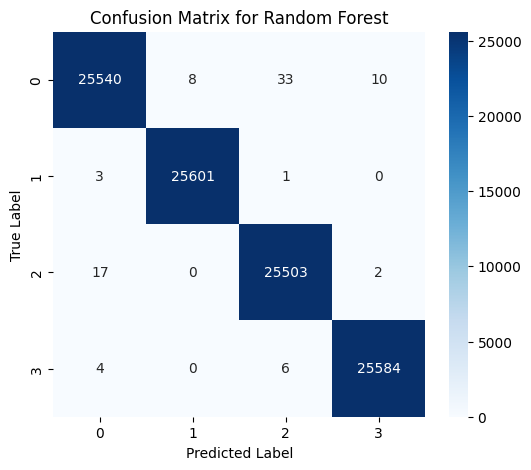

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_best_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_test), yticklabels=set(y_test))

# Labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title(f"Confusion Matrix for {best_model_name}")

# Show the plot
plt.show()


In [ ]:
# Display the mapping of class labels to encoded values
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping: ", label_mapping)

Label Mapping:  {'BENIGN': 0, 'DDoS': 1, 'DoS': 2, 'PortScan': 3}
